In [145]:
import pandas as pd
import numpy as np

# Pandas Series and DataFrames 

![Test](https://www.w3resource.com/w3r_images/pandas-data-structure.svg)

## Create dataframes

In [4]:
data = [
    ["Mark", 55, "Italy", 4.5, "Europe"],
    ["John", 33, "USA", 6.7, "America"],
    ["Tim", 41, "USA", 3.9, "America"],
    ["Jenny", 12, "Germany", 9.0, "Europe"],
]

df = pd.DataFrame(
    data=data,
    columns=["name", "age", "country", "score", "continent"],
    index=[1001, 1000, 1002, 1003],
)
df

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1001 to 1003
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4 non-null      object 
 1   age        4 non-null      int64  
 2   country    4 non-null      object 
 3   score      4 non-null      float64
 4   continent  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 192.0+ bytes


## Loading data from external sources

In [161]:
df_conti = pd.read_excel("resources/StormGeo_Conti_HistoricalForecasts_DE_2022-05-04_184123.xlsx", parse_dates=["Forecast", "Date"])

In [168]:
df_day_ahead = (df_conti.groupby("Forecast")
                .resample("D", on="Date")["Price"]
                .mean()
                .reset_index()
                .groupby("Forecast")
                .nth(1)
                .set_index("Date")
)

<AxesSubplot:xlabel='Date'>

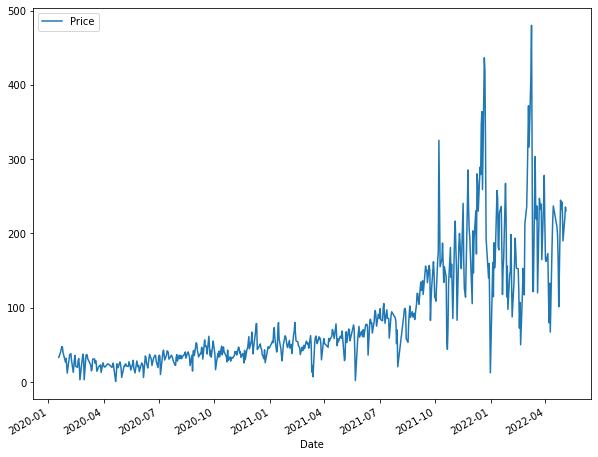

In [175]:
df_day_ahead.plot(kind="line", figsize=[10, 8])

## Working with Excel

Using XlWings we can work rather easily with excel files. Let's try it out.

In [1]:
import xlwings as xw

Let's create a new book

In [4]:
xw.Book("resources/napm_results.xlsx")

In [33]:
df = xw.load()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

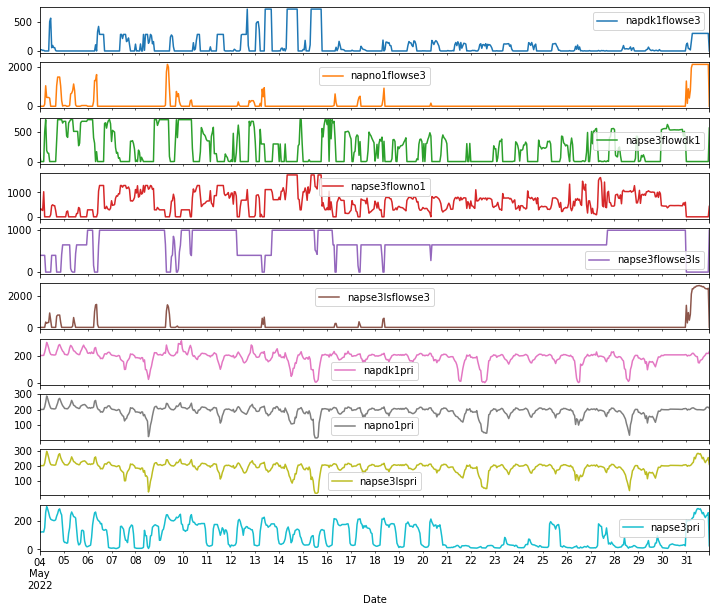

In [77]:
df.plot(figsize=[12, 10], subplots=True)

## Filter and query the data

Let's find out what the average price difference between SE3 and NO1

In [155]:
df_filtered = (
    df.query("napdk1flowse3 + napse3flowse3ls == napse3flowno1")
    .query("napse3flowno1 > 0")
    .round(2)
    .assign(diffdk1se3 = df["napdk1pri"] - df["napse3pri"])
    .sort_values(by="napdk1flowse3", ascending=True)
    .query("napdk1flowse3 > 300")
)

In [156]:
df_filtered

,napdk1flowse3,napno1flowse3,napse3flowdk1,napse3flowno1,napse3flowse3ls,napse3lsflowse3,napdk1pri,napno1pri,napse3lspri,napse3pri,diffdk1se3
Date,,,,,,,,,,,
2022-05-13 01:00:00,472.08,0.0,0.0,872.08,400.0,0.0,188.97,189.24,188.97,26.15,162.812528
2022-05-13 02:00:00,496.41,0.0,0.0,896.41,400.0,0.0,186.81,187.52,186.82,24.74,162.069098
2022-05-13 03:00:00,499.13,0.0,0.0,899.13,400.0,0.0,187.59,188.29,187.59,27.72,159.871389
2022-05-13 12:00:00,715.00,0.0,0.0,1115.00,400.0,0.0,167.76,173.49,170.74,167.75,0.011416
2022-05-12 16:00:00,715.00,0.0,0.0,1115.00,400.0,0.0,172.78,178.50,175.79,157.20,15.578417
2022-05-13 10:00:00,715.00,0.0,0.0,1115.00,400.0,0.0,185.93,192.08,189.38,185.92,0.011841
2022-05-13 11:00:00,715.00,0.0,0.0,1115.00,400.0,0.0,167.76,173.49,170.66,167.75,0.007916
2022-05-13 14:00:00,715.00,0.0,0.0,1115.00,400.0,0.0,160.76,166.24,163.99,160.74,0.019783
2022-05-13 15:00:00,715.00,0.0,0.0,1115.00,400.0,0.0,164.57,170.02,167.62,164.54,0.027111


In [119]:
xw.view(df_filtered, xw.sheets.active)